# San Francisco Crime Classification Data
데이터 링크 : <https://www.kaggle.com/c/sf-crime/data?select=sampleSubmission.csv.zip>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/SanFranciscoCrime_train.csv")

In [3]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
df.shape

(878049, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [6]:
df.describe(include="number")

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [7]:
df.describe(include="object")

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,878049,878049,878049,878049,878049,878049,878049
unique,389257,39,879,7,10,17,23228
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,185,174900,60022,133734,157182,526790,26533


## 1. 지역(PdDistrict)별로 범죄 발생건수

In [8]:
df["PdDistrict"].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

<AxesSubplot:>

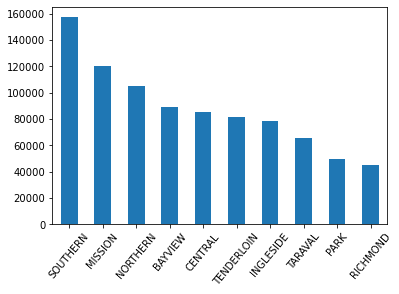

In [9]:
df["PdDistrict"].value_counts().plot.bar(rot=50)

## 2. 요일(DayOfWeek)별로 범죄 발생건수

In [10]:
df["DayOfWeek"].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

<AxesSubplot:>

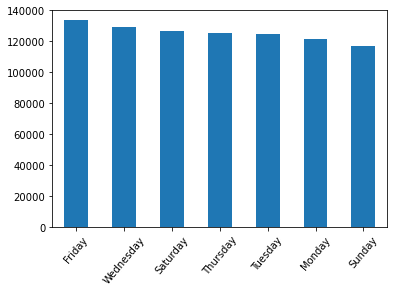

In [11]:
df["DayOfWeek"].value_counts().plot.bar(rot=50)

- 금요일(Friday)에 범죄가 가장 많이 발생한다. 

## 3. 거리(Address)별 범죄 발생 빈도를 계산하여 범죄 발생이 많은 상위 10개  거리 목록 작성

In [12]:
df["Address"].value_counts()

800 Block of BRYANT ST      26533
800 Block of MARKET ST       6581
2000 Block of MISSION ST     5097
1000 Block of POTRERO AV     4063
900 Block of MARKET ST       3251
                            ...  
0 Block of JULIUS ST            1
HILTON ST / BAY SHORE BL        1
ECKER ST / MISSION ST           1
CABRILLO ST / GREAT HY          1
600 Block of UTAH ST            1
Name: Address, Length: 23228, dtype: int64

In [13]:
df_adr = df["Address"].value_counts().reset_index()
df_adr.head()

,index,Address
0,800 Block of BRYANT ST,26533
1,800 Block of MARKET ST,6581
2,2000 Block of MISSION ST,5097
3,1000 Block of POTRERO AV,4063
4,900 Block of MARKET ST,3251


In [14]:
df_adr.columns = ["Address", "Count"]
df_adr.head()

,Address,Count
0,800 Block of BRYANT ST,26533
1,800 Block of MARKET ST,6581
2,2000 Block of MISSION ST,5097
3,1000 Block of POTRERO AV,4063
4,900 Block of MARKET ST,3251


In [15]:
df_adr.sort_values(by="Count", ascending=False)
df_adr.head(10)

,Address,Count
0,800 Block of BRYANT ST,26533
1,800 Block of MARKET ST,6581
2,2000 Block of MISSION ST,5097
3,1000 Block of POTRERO AV,4063
4,900 Block of MARKET ST,3251
5,0 Block of TURK ST,3228
6,0 Block of 6TH ST,2884
7,300 Block of ELLIS ST,2703
8,400 Block of ELLIS ST,2590
9,16TH ST / MISSION ST,2504


## 4. 범죄가 한 건도 발생하지 않은 거리(Address)는 몇 군데인가?

In [16]:
df_adr["Count"] == 0

0        False
1        False
2        False
3        False
4        False
         ...  
23223    False
23224    False
23225    False
23226    False
23227    False
Name: Count, Length: 23228, dtype: bool

In [17]:
sum(df_adr["Count"] == 0)

0

## 5. 차량 절도(VEHICLE THEFT) 범죄의 월(Month)별 발생 빈도는?

Datetime에서 월 추출 : <https://www.delftstack.com/ko/howto/python-pandas/how-to-extract-month-and-year-separately-from-datetime-column-in-pandas/>

In [41]:
import datetime

In [58]:
df["Dates"] = pd.to_datetime(df["Dates"])
df.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [59]:
df["Month"] = df["Dates"].dt.month
df["Month"]

0         5
1         5
2         5
3         5
4         5
         ..
878044    1
878045    1
878046    1
878047    1
878048    1
Name: Month, Length: 878049, dtype: int64

In [60]:
df["Month"].value_counts()

10    80274
5     79644
4     78096
3     76320
1     73536
11    72975
9     71982
6     70892
2     70813
7     69971
8     68540
12    65006
Name: Month, dtype: int64

- 월별 범죄 발생 빈도

<AxesSubplot:>

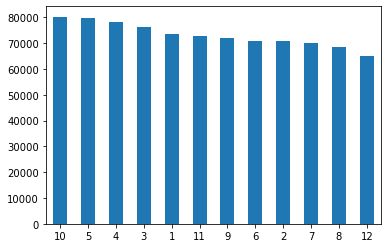

In [61]:
df["Month"].value_counts().plot.bar(rot=0)

In [65]:
df_vehicle = df[df["Category"] == "VEHICLE THEFT"].copy()
df_vehicle.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Month
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,5
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,5


- 월별 차량 범죄 발생 빈도

<AxesSubplot:>

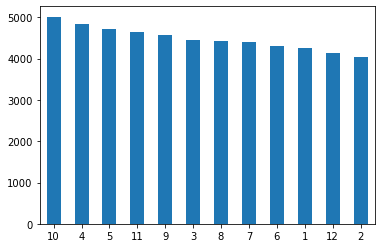

In [67]:
df_vehicle["Month"].value_counts().plot.bar(rot=0)

## 6. 차량 절도가 가장 많이 발생하는 달은? 가장 적게 발생하는 달은?
- 가장 많이 발생하는 달은 10월
- 가장 적게 발생하는 달은 2월

## 7. 납치(KIDNAPPING) 범죄의 시간(Hours)에 따른 발생 빈도는? 가장 많이 발생하는 시간대는? 가장 적게 발생하는 시간대는?

In [70]:
df["Hours"] = df["Dates"].dt.hour
df.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Month,Hours
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,23


- 시간별 범죄 발생 빈도

<AxesSubplot:>

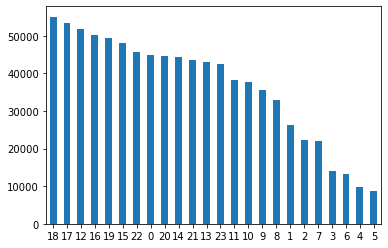

In [72]:
df["Hours"].value_counts().plot.bar(rot=0)

In [73]:
df_kidnap = df[df["Category"] == "KIDNAPPING"].copy()
df_kidnap.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Month,Hours
242,2015-05-13 12:21:00,KIDNAPPING,FALSE IMPRISONMENT,Wednesday,INGLESIDE,"ARREST, BOOKED",1500 Block of DOLORES ST,-122.424348,37.745046,5,12
328,2015-05-13 04:45:00,KIDNAPPING,KIDNAPPING DURING ROBBERY,Wednesday,SOUTHERN,NONE,1500 Block of MARKET ST,-122.419667,37.774682,5,4


- 시간별 납치 범죄 발생 빈도

<AxesSubplot:>

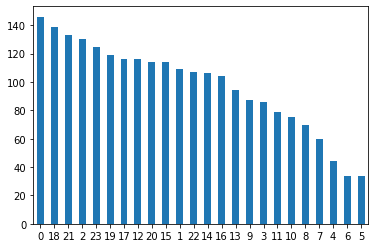

In [74]:
df_kidnap["Hours"].value_counts().plot.bar(rot=0)

- 0시 즉 밤 12시에 납치 범죄가 가장 많이 발생한다. 
- 아침 5, 6시 경에 납치 범죄가 가장 적게 발생한다. 